#### Objective : Perform EDA on the IRIS dataset and try to find out which features are more important to classiy if a new sample is given ? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
'''Downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv.'''
iris = pd.read_csv('Resources/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**[Q] How many datapoints and features are present in the dataset ?**\
[A] From the below information we came to know that the iris dataset contains 150 entries with 5 columns

In [3]:
iris.shape

(150, 5)

**[Q] What are the names of columns present in the dataset ?**\
[A] the names of the columns are petal_length, petal_width, sepal_length, peta_length, species

In [4]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


**[Q] How many datapoints are present in for each class in dataset or How many flowers of each species are present in the dataset ?**\
[A] there are 50 samples of each class present in the dataset, so we can conclude its a balanced dataset

In [5]:
print(iris.species.value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


#### From the below two graphs the following points can observed:
- **petal length** values usually range between **0-7**
- **petal width** values usually range between  **0-2.5**
- **sepal length** values usually range between **3.0 - 8.0**
- **sepal width** values usually range between **2.0-4.5**

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

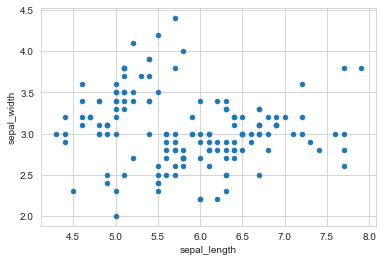

In [6]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

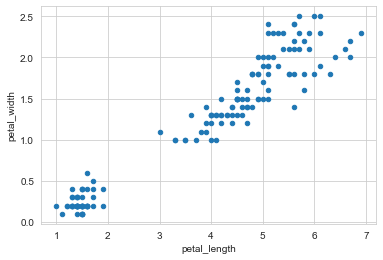

In [7]:
iris.plot(kind='scatter', x='petal_length', y='petal_width')

#### 1.Sepal_length vs Sepal_width
- From the below two graphs its pretty clear that **setosa** flowers are well seperated from **versicolor** and **virginica**, however **versicolor** and **virginica** flowers are mixed up, hardly seperable
- Setosa flowers usually have sepal_width from **2.8 - 4.5** & sepal_length upto **5.7**
- On the otherhand versicolor & virginica flowers have sepal_width from **2.0 - 3.7** & sepal_lengths from **4.7 - 7.9**

#### Observations:
1. Using sepal_length and sepal_width, setosa flowers are linearly seperable from other class labels
2. However versicolor and virginica are hard to seperate from each other having considerable overlap


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

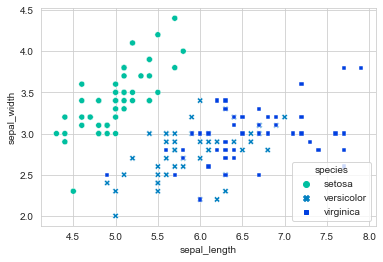

In [8]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=iris,hue='species', style='species',palette='winter_r')

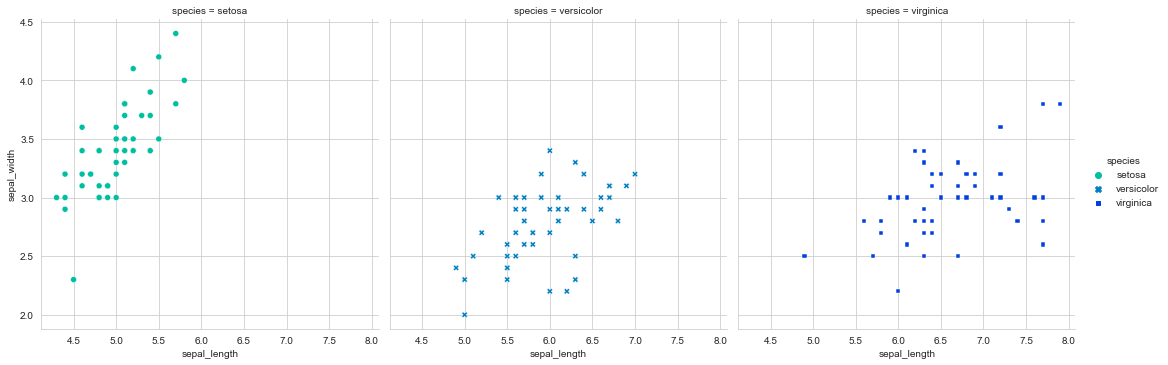

In [9]:
sns.relplot(x='sepal_length',y='sepal_width',data=iris,hue='species', style='species',palette='winter_r',col='species')

#### 2.sepal_length vs petal_length
- Similar to the previous graph **setosa** flowers are clearly seperated from **versicolor** & **virginica** flowers, whereas **versicolor** and **virginica** flowers are clustered pretty good, still not seperable from each other, having a wide mixed area
- setosa flowers have petal_lenghts from **0.8 - 1.9** & sepal_lengths from **3.8 - 5.8**
- versicolor flowers have petal_lenghts from  **2.8 - 5.2** & sepal_lengths from **4.8 - 7.0**
- virginica flowers have petal_lengths from **4.5 - 6.9** & sepal_lengths from **4.7 - 8.0**


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

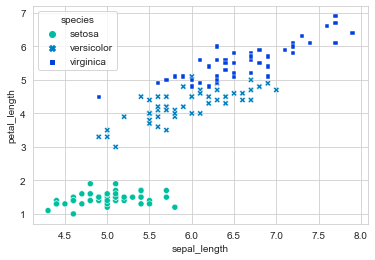

In [10]:
sns.scatterplot(x='sepal_length',y='petal_length',data=iris, hue='species', style='species',palette='winter_r')

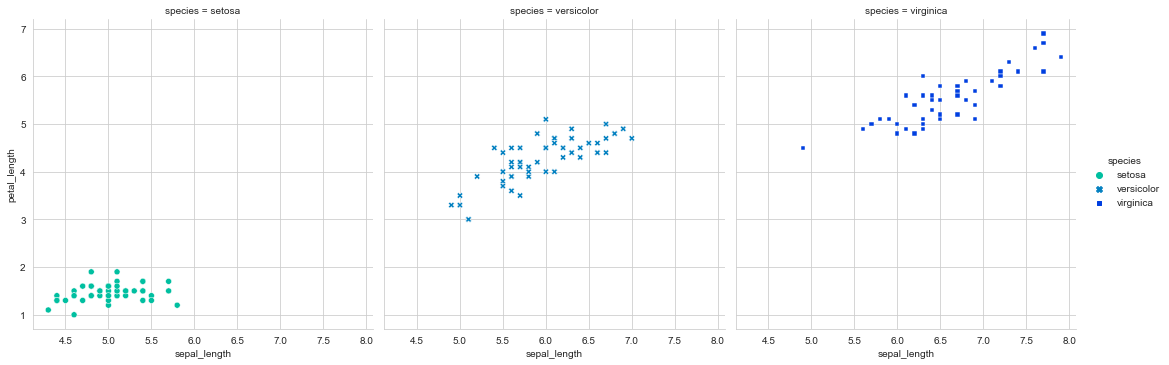

In [11]:
sns.relplot(x='sepal_length',y='petal_length',data=iris, hue='species', style='species',palette='winter_r', col='species')

#### 3.sepal_length vs petal_width
- Similar to the previous graph **setosa** flowers are clearly seperated from **versicolor** & **virginica** flowers, whereas **versicolor** and **virginica** flowers are clustered pretty good, still not seperable from each other, having a wide mixed area
- setosa flowers have petal_lenghts from **0.8 - 1.9** & sepal_lengths from **3.8 - 5.8**
- versicolor flowers have petal_lenghts from  **2.8 - 5.2** & sepal_lengths from **4.8 - 7.0**
- virginica flowers have petal_lengths from **4.5 - 6.9** & sepal_lengths from **4.7 - 8.0**


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

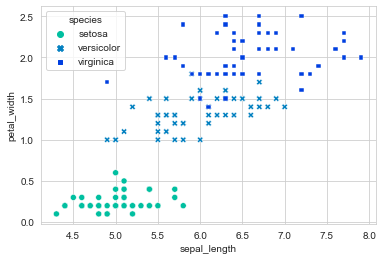

In [12]:
sns.scatterplot(x='sepal_length',y='petal_width',data=iris,hue='species',style='species',palette='winter_r')

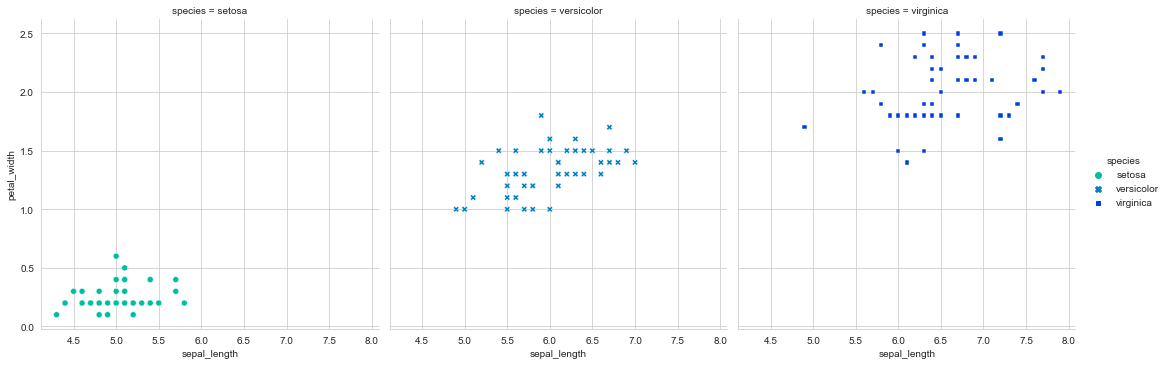

In [13]:
sns.relplot(x='sepal_length',y='petal_width',data=iris,hue='species',style='species',palette='winter_r',col='species')

#### 4.sepal_width vs petal_length
- **setosa** flowers are clearly seperated from **versicolor** and **virginica** flowers having petal_lengths from **0.8 - 1.9** and sepal_widths from **2.3 - 4.5**
- **versicolor** flowers have petal_length from **3.0 - 5.2** and sepal_widths from **2.0 - 3.4**
- **virginica** flowers have petal_length from **4.5 - 7.0** and sepal_widths from **2.3 - 3.8**
- **versicolor** & **virginica** flowers are mixed near petal_lengths **4-5** making hard to seperate them

<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

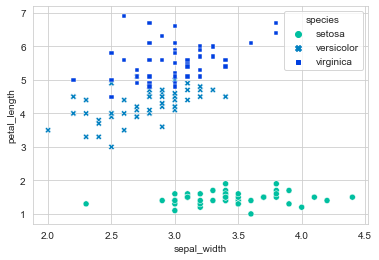

In [14]:
sns.scatterplot(x='sepal_width',y='petal_length',data=iris, hue='species', style='species',palette='winter_r')

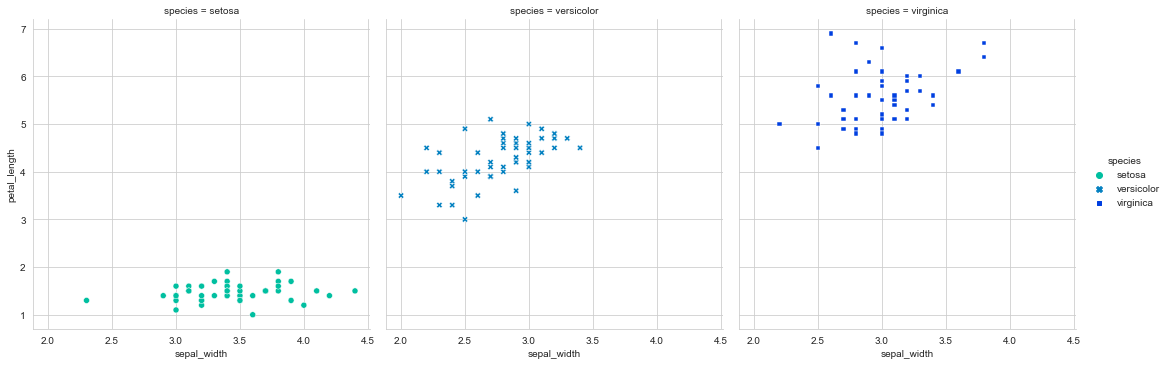

In [15]:
sns.relplot(x='sepal_width',y='petal_length',data=iris, hue='species', style='species',palette='winter_r', col='species')

#### 5.sepal_width vs petal_width
- **setosa** flowers are cleary seperated from **versicolor** & **virginica** flowers having petal_width from **0.1 - 0.7** and sepal_width from **2.3 - 4.7**
- **versicolor** flowers have petal_width from **0.9 - 1.7** and sepal_width from **2.0 - 3.4**
- **virginica** flowers have petal_width from **1.3 - 2.6** and sepal_width from **2.2 - 3.8**
- **versicolor** and **virginica** flowers are mixed up at petal_widths **1.4 - 1.8** make them hard to seperate


<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

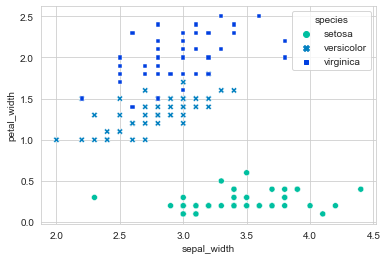

In [16]:
sns.scatterplot(x='sepal_width',y='petal_width',data=iris, hue='species', style='species',palette='winter_r')

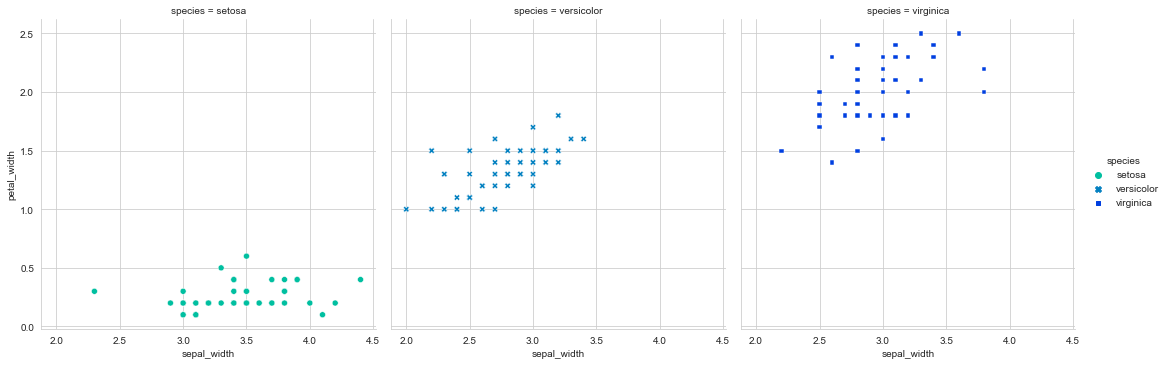

In [17]:
sns.relplot(x='sepal_width',y='petal_width',data=iris, hue='species', style='species',palette='winter_r',col='species')

#### 6.petal_length vs petal_width
- **setosa** flowers are clearly seperated from **versicolor** &  **virginica** flowers having petal_widths from **0.1 - 0.7** and petal_lengths from **0.9 - 1.9**
- **versicolor** flowers have petal_widths from **1.0 - 1.8** and petal_lenghts from **3.0 - 5.1**
- **virginia** flowers have petal_widths from **1.3 - 2.6** and petal_lenghts from **4.5 - 6.9**
- eventhough similar to other plots above **versicolor** & **virginica** flowers are mixedup at petal_widths **1.3 - 1.7**, making them hard to seperate, however the area of mixing is less comapared to previous plots, hence making petal_width & petal_length considerable features for classifying new flowers

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

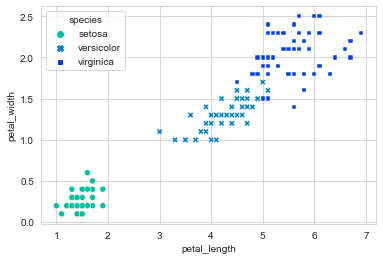

In [18]:
sns.scatterplot(x='petal_length',y='petal_width',data=iris, hue='species', style='species',palette='winter_r')

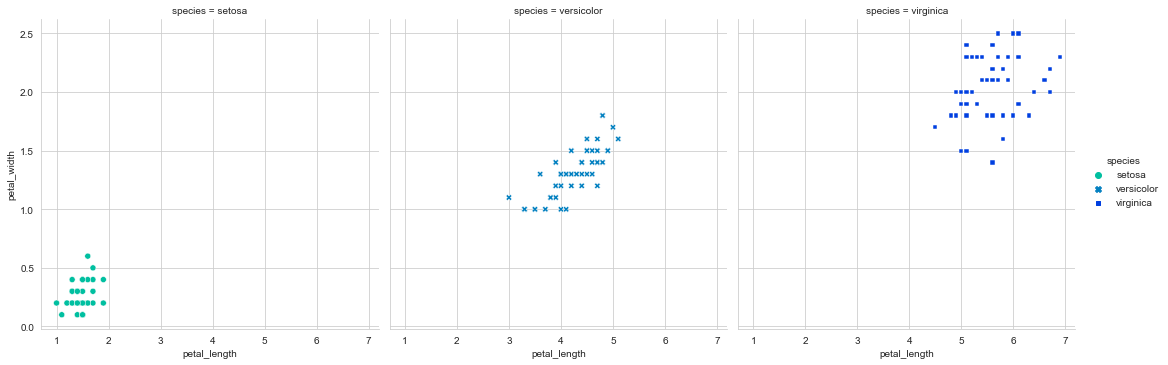

In [19]:
sns.relplot(x='petal_length',y='petal_width',data=iris, hue='species', style='species',palette='winter_r',col='species')

### Pairplot
#### Observations : 
1. petal_length and petal_width are the most useful features to identify various flower types
2. while setosa can be easily identified (linearly seperable), versicolor  and virginica have some overlap (almost lineraly seperable)
3. we can use lines or if-else conditions to build a simple model to classify the flower types

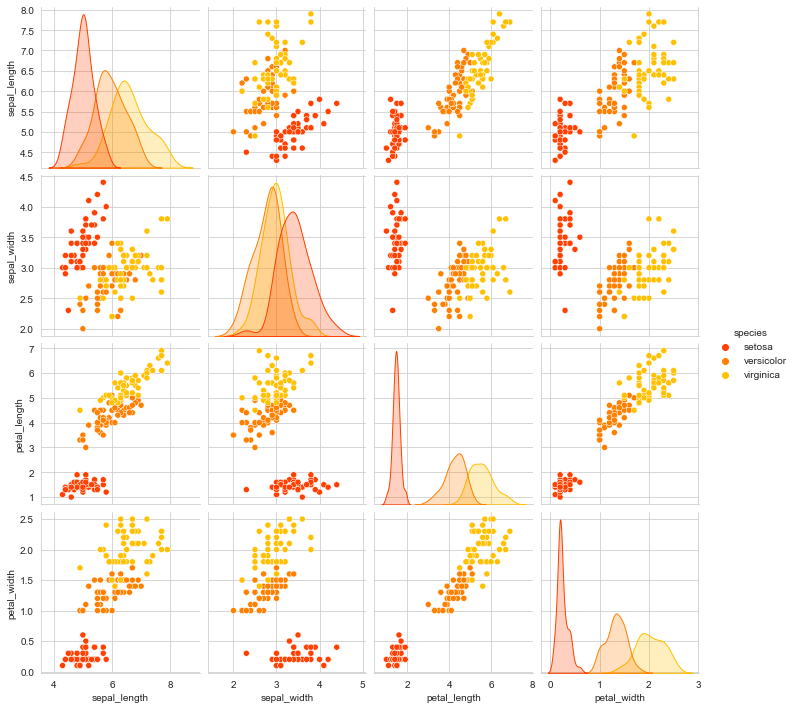

In [20]:
sns.pairplot(iris, hue='species',palette='autumn')

In [21]:
setosa = iris.loc[iris.species == 'setosa']
versicolor = iris.loc[iris.species == 'versicolor']
virginica = iris.loc[iris.species =='virginica']

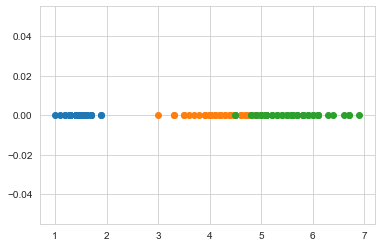

In [22]:
plt.plot(setosa.petal_length,np.zeros_like(setosa.petal_length),'o')
plt.plot(versicolor.petal_length,np.zeros_like(versicolor.petal_length),'o')
plt.plot(virginica.petal_length,np.zeros_like(virginica.petal_length),'o')
plt.show()

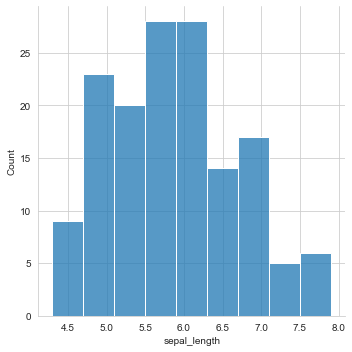

In [23]:
sns.displot(iris.sepal_length)

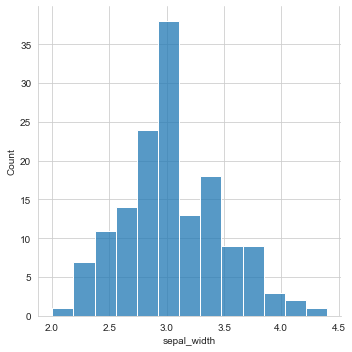

In [24]:
sns.displot(iris.sepal_width)

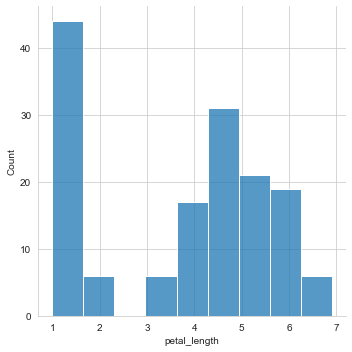

In [25]:
sns.displot(iris.petal_length)

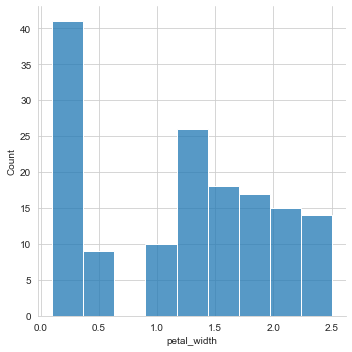

In [26]:
sns.displot(iris.petal_width)

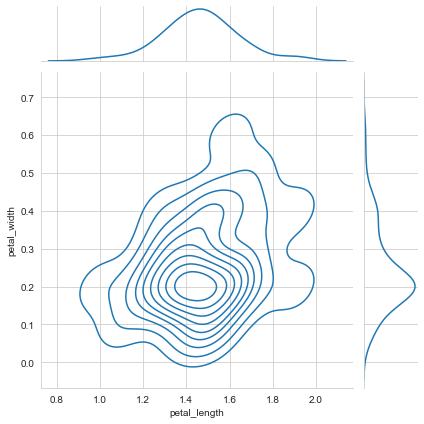

In [27]:
sns.jointplot(x='petal_length',y='petal_width',data=setosa,kind='kde')